`init`  

-----

In [1]:
import pandas as pd

from numpy import linspace
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import matplotlib.patheffects as plte
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.ticker import ScalarFormatter


In [2]:
def add_q_reader(readers, dir, ext):
    f = open( dir + '/average.csv', 'r', newline='')
    r = pd.read_csv(f, sep='\t')
    args = " ".join(r["Method"][0].split(" ")[3:])
    a = r["Method"].map(lambda x: x.split(" ")[2])

    r["Method"].update(a)
    r.drop_duplicates(subset=["Res bpp"], inplace=True, ignore_index=True)
    if ext == "jxl":
        readers["cjxl -q N " + args] = r
    if ext == "webp":
        readers["webp -q N " + args] = r

In [3]:
def add_avif_reader(readers, dir):
    f = open( dir + '/average.csv', 'r', newline='')
    r = pd.read_csv(f, sep='\t')
    args = " ".join(r["Method"][0].split("--max ")[1].split(" ")[1:])
    a = r["Method"].map(lambda x: x.split("--max ")[1].split(" ")[0])
    r["Method"].update(a)
    r.drop_duplicates(subset=["Res bpp"], inplace=True, ignore_index=True)

    readers["avifenc --min (N-2) --max N " + args] = r

In [4]:
def plot_2d(ax_main, ax_bottom, x, y, x_new, y_new, label=''):
    sc1_main = ax_main.plot(x_new, y_new, label=label)
    sc2 = ax_main.scatter(x, y,
                          linewidths=1, alpha=.7,
                          marker='o',
                          edgecolor='k',
                          s=20,
                          c='None')
    sb = ax_bottom.plot(x_new, z_new)

In [5]:
def plot_config(ax_main, ax_bottom):
    ax_main.grid(True, color='gray')
    ax_main.minorticks_on()
    ax_main.grid(True, which='minor', color='lightgray')
    # ax_main.set_xticks(np.arange(min(x_new), max(x_new)+1, 0.5))
    ax_main.set_xlabel("BPP")
    ax_main.set_ylabel(metric)
    # ax_main.set_ylabel("butteraugli pnorm")

    ax_main.legend()

    ax_bottom.grid(True, color='gray')
    ax_bottom.minorticks_on()
    ax_bottom.grid(True, which='minor', color='lightgray')
    # ax_bottom.set_xticks(np.arange(min(x_new), max(x_new)+1, 0.5))
    ax_bottom.set_ylim(0, 105)
    ax_bottom.set_ylabel("settings")

In [6]:
# colors=["tab:blue", "tab:orange", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

# Settings
----

In [10]:
# metric="butteraugli max norm"
# metric="butteraugli pnorm"
metric="ssimulacra"

In [11]:
readers = {}
folders = [
    ["avif", "avif"],
    ["jxl_s7", "jxl"],
#     ["jxl_s8", "jxl"],
#     ["jxl_s9", "jxl"],
    ["webp", "webp"],
    ]
    
for i in folders:
    if i[1] == "jxl" or i[1] == "webp":
        add_q_reader(readers, i[0], i[1])
    if i[1] == "avif":
        add_avif_reader(readers, i[0])

# Plot
____

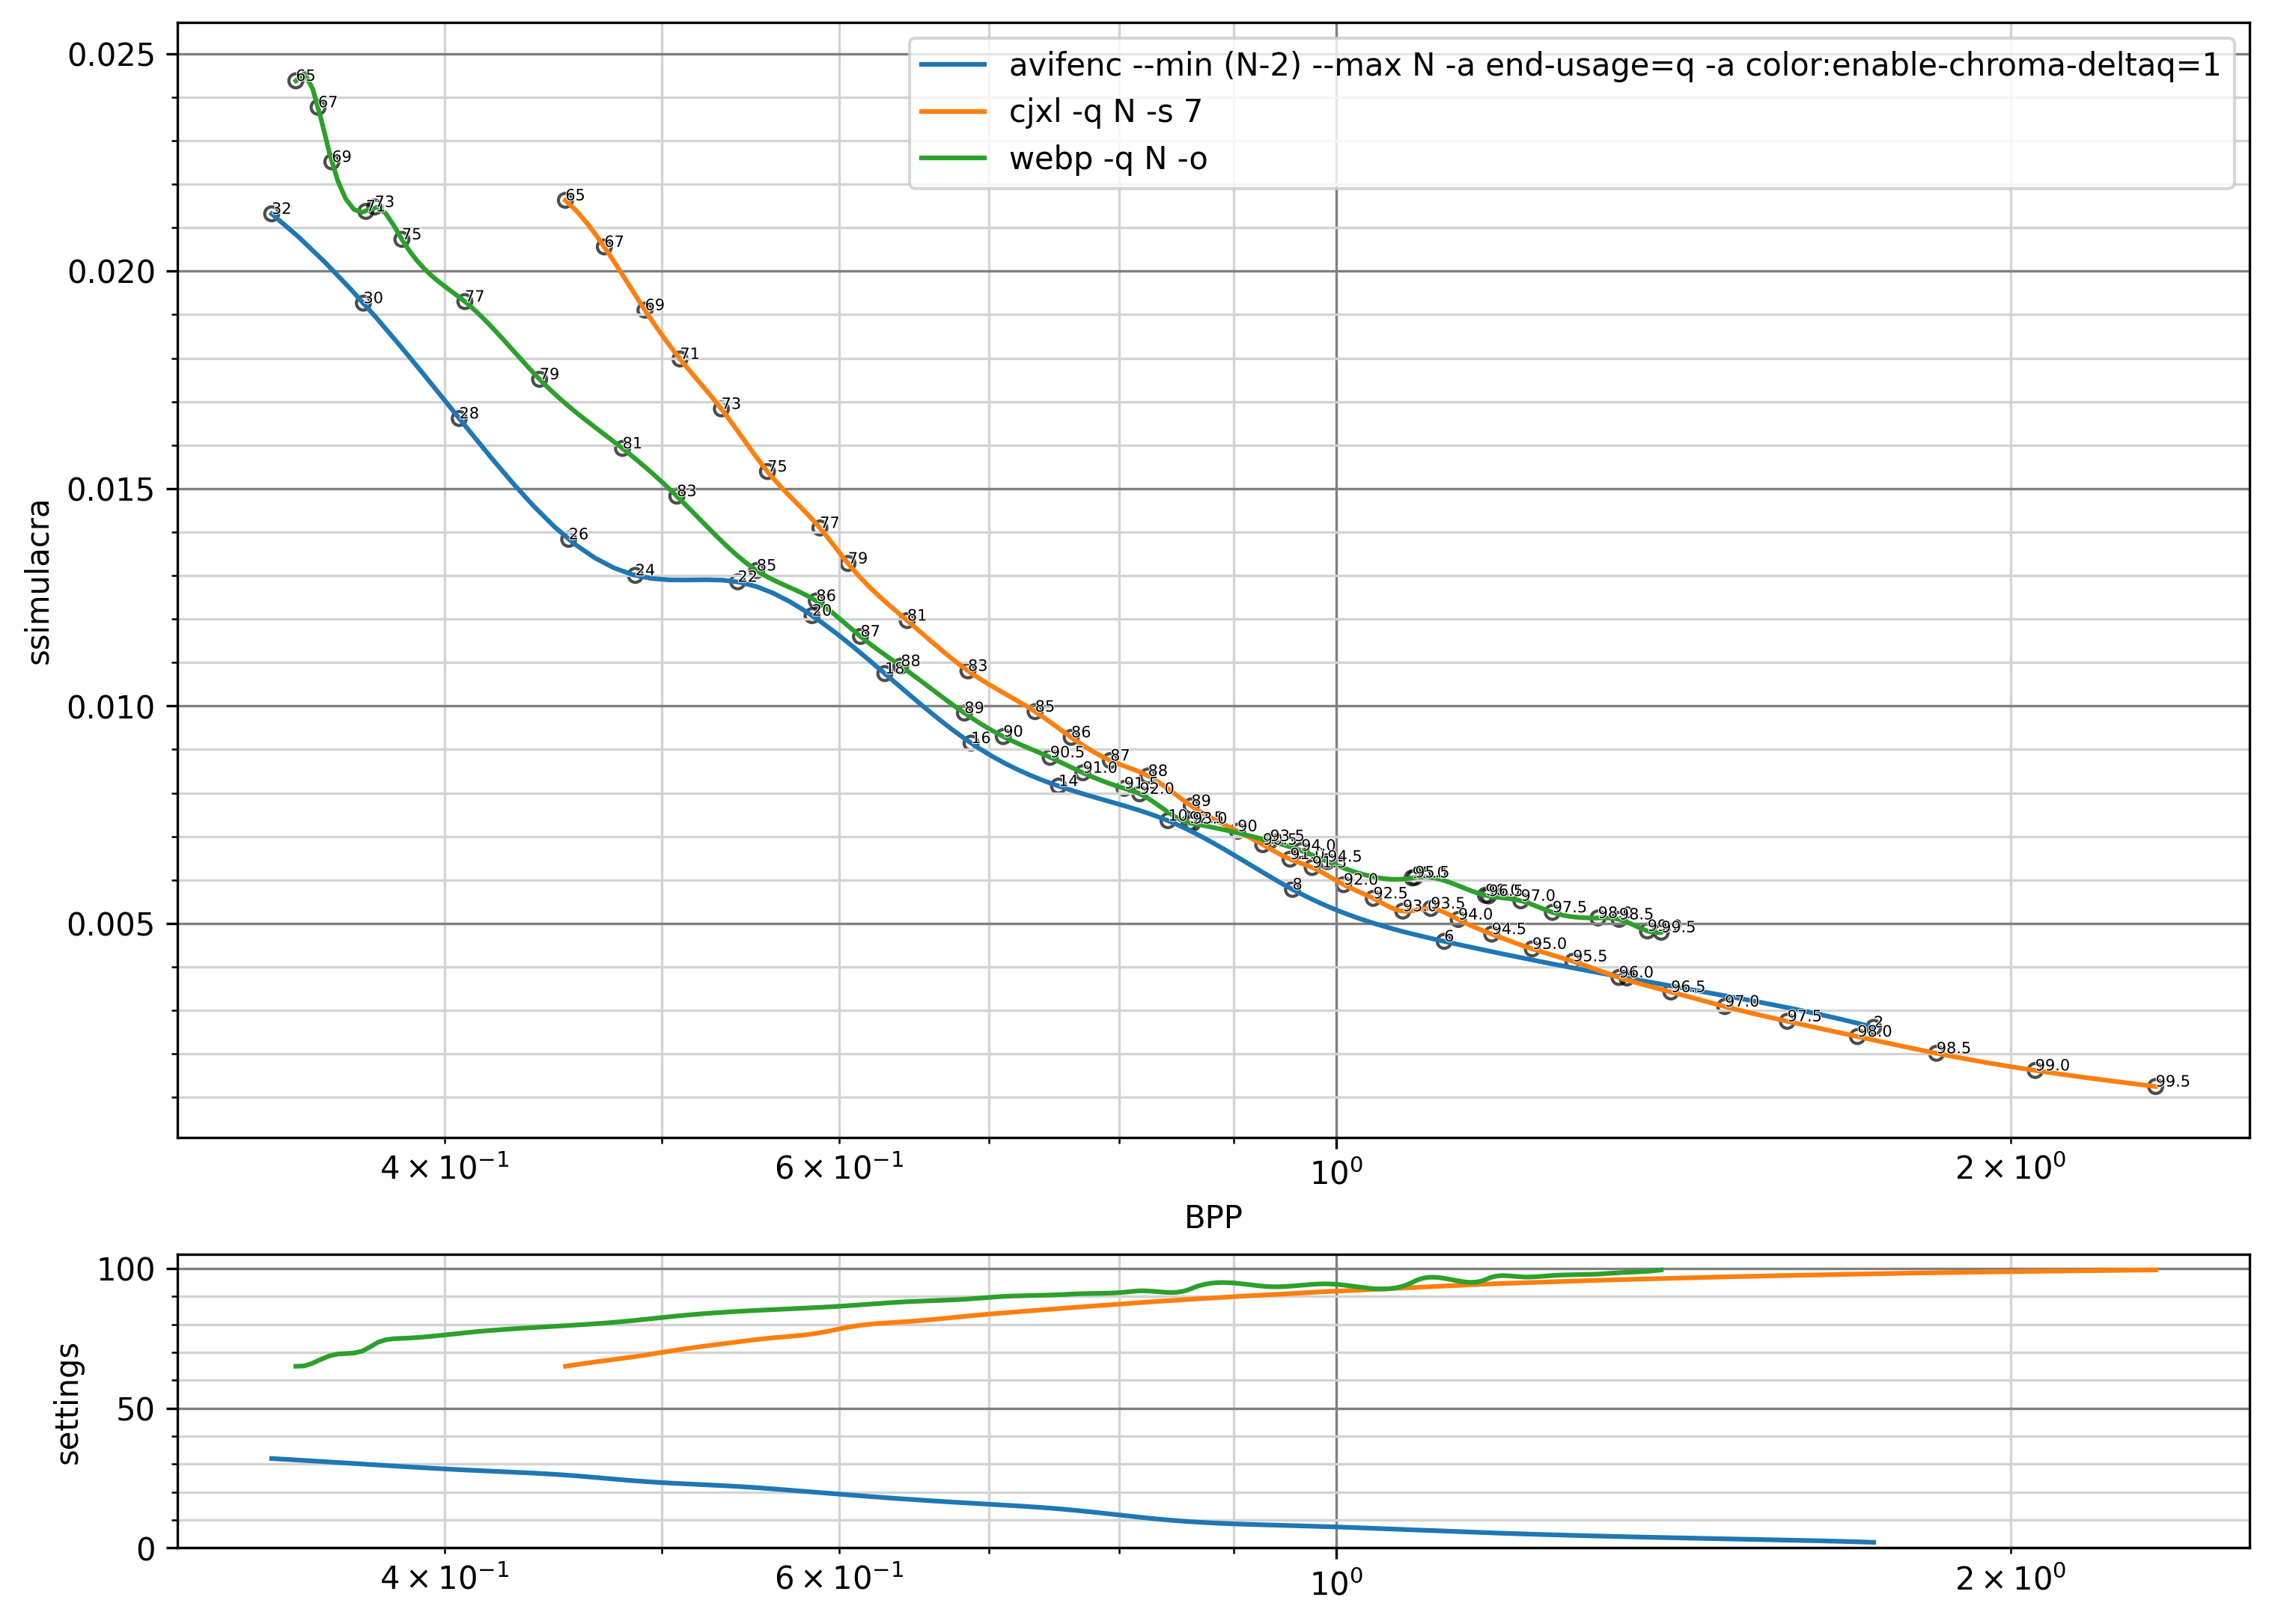

In [12]:
fig = plt.figure(figsize=(16, 9), dpi=300)
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.1)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[])
ax_main.set_xscale('log')
ax_bottom.set_xscale('log')
# ax_main.xaxis.set_major_formatter(ScalarFormatter())

# PLOT DATA
for n, r in readers.items():
    x = r["Res bpp"]
    y = r[metric]
    z = r["Method"]
    f_y = interp1d(x, y, kind="cubic")
    f_z = interp1d(x, z, kind="cubic")
    x_new = linspace(min(x), max(x), num=len(x)*10)
    y_new = f_y(x_new)
    z_new = f_z(x_new)
    plot_2d(ax_main, ax_bottom, x, y, x_new, y_new, label=n)
    # add text markers -- quality
    for i, txt in enumerate(z):
        j = ax_main.annotate(str(txt), (x[i], y[i]), color="black")
        j.set_fontsize(5)
        j.set_path_effects([plte.Stroke(linewidth=0.5, foreground='white'),
                       plte.Normal()])


plot_config(ax_main, ax_bottom)
plt.show()
